# Hyperparameter optimisation scoring and time analysis

In [14]:
import re
import json
import pprint
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt

In [15]:
def plot_line_graph(trial_names, trial_scores, time_sec_values, dataset_name, model_name):
    # Create a figure and a set of subplots
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot time in seconds on the left y-axis
    ax1.plot(trial_names, time_sec_values, marker='o', color='b', linestyle='-', label='Time (sec)')
    ax1.set_xlabel('Trial')
    ax1.set_ylabel('Time (minutes)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_xticklabels(trial_names, rotation=90)
    
    # Create a second y-axis for scores
    ax2 = ax1.twinx()
    ax2.plot(trial_names, trial_scores, marker='o', color='g', linestyle='-', label='Score')
    ax2.set_ylabel('Score', color='g')
    ax2.tick_params(axis='y', labelcolor='g')
    ax2.set_ylim(0, 1)  # Set the scale from 0 to 1 for clarity

    # Title and legend
    plt.title(f'Dataset: {dataset_name}, Model: {model_name}')
    fig.tight_layout()  # Adjust the layout to prevent clipping of ylabel
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 1))
    
    plt.show()

In [11]:
HPO_DATASETS = ["adult", "loan"]

## Adult dataset

/var/folders/3l/sc82d46d2_lbr0vhyw2tf0t80000gn/T/ipykernel_38670/885196601.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(trial_names, rotation=90)


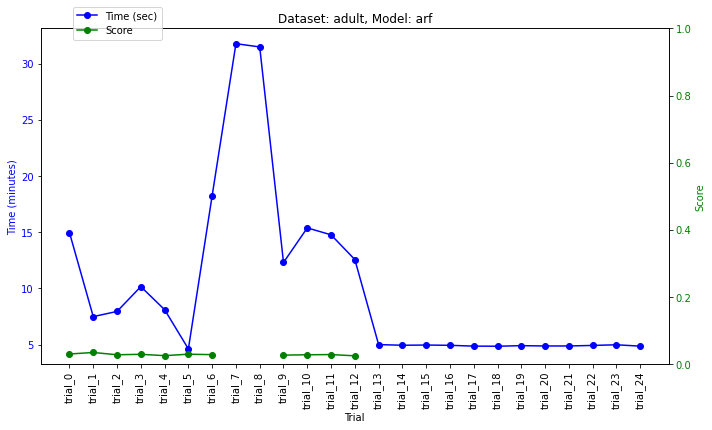

/var/folders/3l/sc82d46d2_lbr0vhyw2tf0t80000gn/T/ipykernel_38670/885196601.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(trial_names, rotation=90)


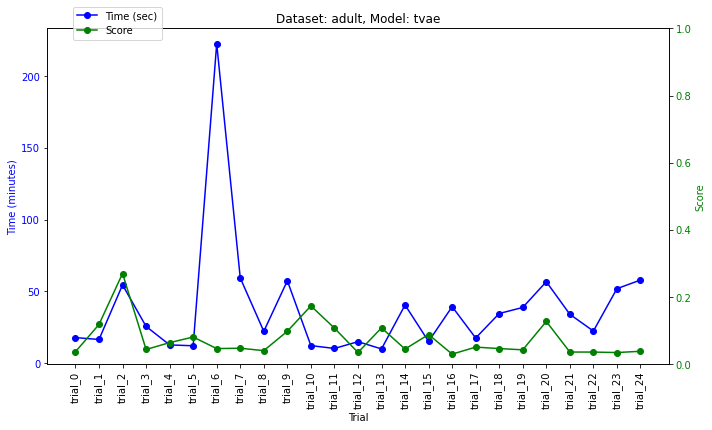

/var/folders/3l/sc82d46d2_lbr0vhyw2tf0t80000gn/T/ipykernel_38670/885196601.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(trial_names, rotation=90)


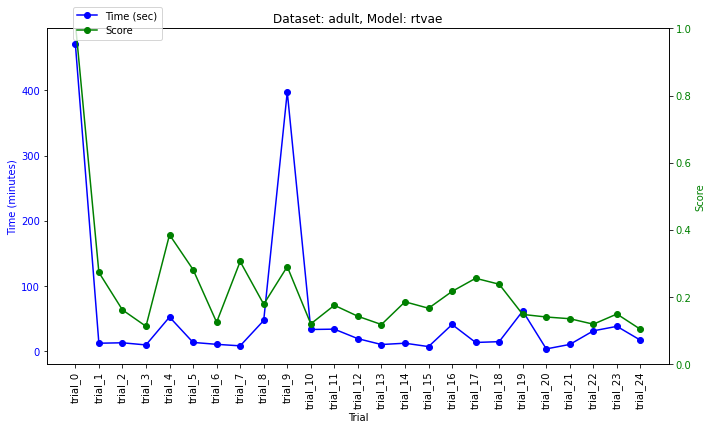

/var/folders/3l/sc82d46d2_lbr0vhyw2tf0t80000gn/T/ipykernel_38670/885196601.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(trial_names, rotation=90)


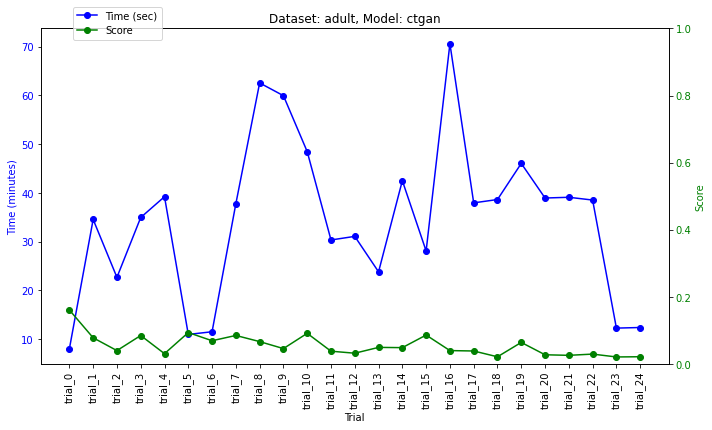

/var/folders/3l/sc82d46d2_lbr0vhyw2tf0t80000gn/T/ipykernel_38670/885196601.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(trial_names, rotation=90)


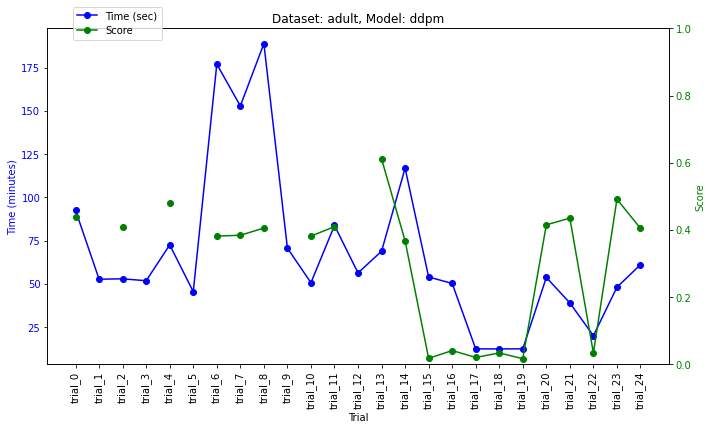

In [12]:
# Extracting time_sec values
models = ["arf", "tvae", "rtvae", "ctgan", "ddpm"]
for model in models:
    sdv_final_path = f"../final_outs/hpo_synthcity_tabular/{model}/adult/adult_{model}_optimiser.json"
    
    with open(sdv_final_path, "r") as json_file:
        data = json.load(json_file)
    trial_names = list(data['trials'].keys())
    trial_scores = [data['trials'][trial]['score'] if data['trials'][trial]['score'] else 0 for trial in trial_names]
    time_sec_values = [data['trials'][trial]['time_sec']/60 for trial in trial_names]
    plot_line_graph(trial_names, trial_scores, time_sec_values, "adult", model)

# Loan dataset

/var/folders/3l/sc82d46d2_lbr0vhyw2tf0t80000gn/T/ipykernel_38670/885196601.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(trial_names, rotation=90)


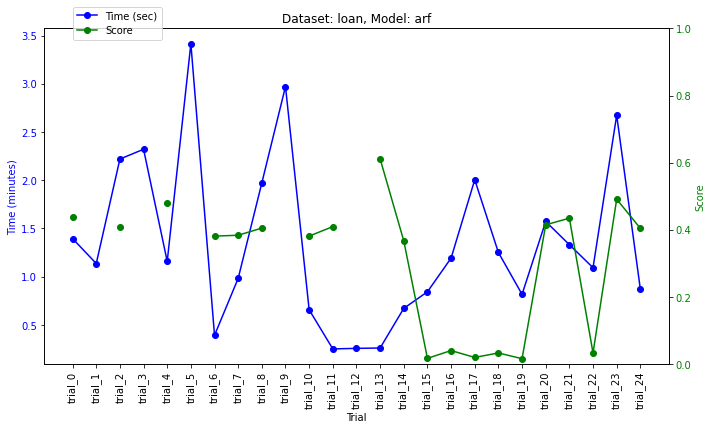

/var/folders/3l/sc82d46d2_lbr0vhyw2tf0t80000gn/T/ipykernel_38670/885196601.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(trial_names, rotation=90)


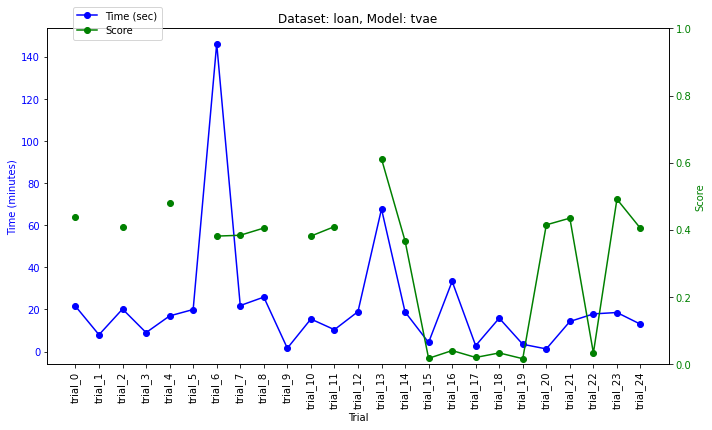

/var/folders/3l/sc82d46d2_lbr0vhyw2tf0t80000gn/T/ipykernel_38670/885196601.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(trial_names, rotation=90)


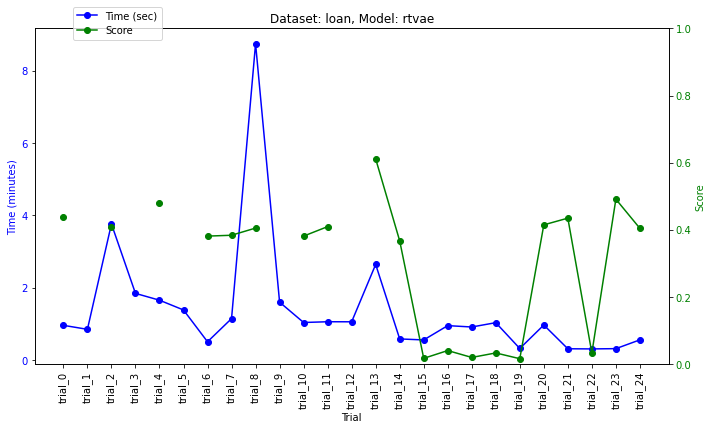

/var/folders/3l/sc82d46d2_lbr0vhyw2tf0t80000gn/T/ipykernel_38670/885196601.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(trial_names, rotation=90)


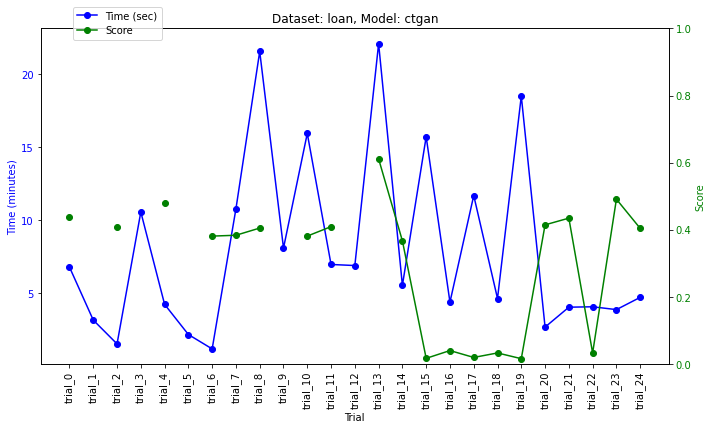

/var/folders/3l/sc82d46d2_lbr0vhyw2tf0t80000gn/T/ipykernel_38670/885196601.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(trial_names, rotation=90)


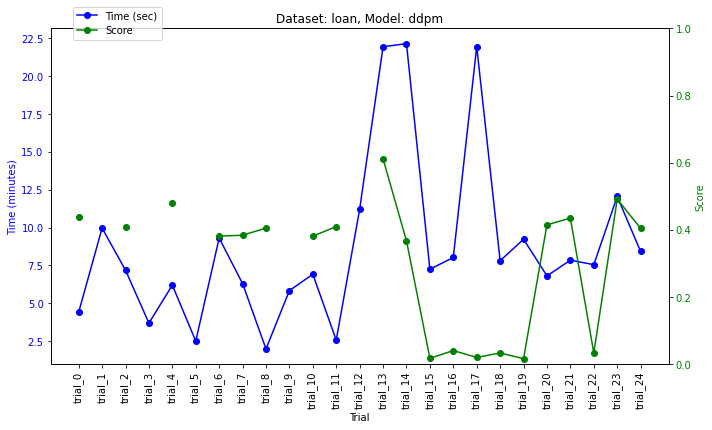

In [13]:
# Extracting time_sec values
models = ["arf", "tvae", "rtvae", "ctgan", "ddpm"]
for model in models:
    sdv_final_path = f"../final_outs/hpo_synthcity_tabular/{model}/loan/loan_{model}_optimiser.json"
    
    with open(sdv_final_path, "r") as json_file:
        data = json.load(json_file)
    trial_names = list(data['trials'].keys())
    time_sec_values = [data['trials'][trial]['time_sec']/60 for trial in trial_names]
    plot_line_graph(trial_names, trial_scores, time_sec_values, "loan", model)